- 머신러닝 알고리즘은 모델의 구조가 어느정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
 
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                                            stratify = y_train, random_state = 26)

In [4]:
# 모델 정의
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.Input(shape = (28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation = "relu"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation = "softmax"))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
history = model.fit(scaled_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7724 - loss: 0.6556
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4085
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8678 - loss: 0.3676
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.3396
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3203


In [8]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy 를 추가하여서 loss 와 accuracy 가 포함됨

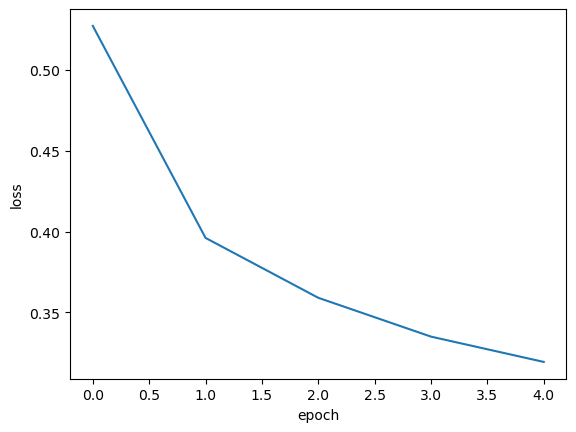

In [9]:
plt.figure()
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

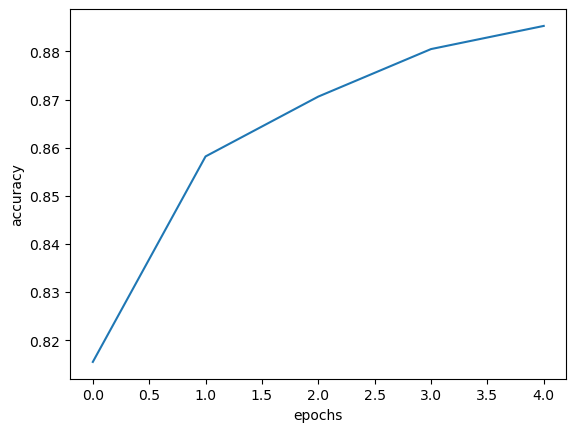

In [10]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [11]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7734 - loss: 0.6679  
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.8539 - loss: 0.4071
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.8703 - loss: 0.3626
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.8783 - loss: 0.3394
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8877 - loss: 0.3150
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8919 - loss: 0.3050
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8975 - loss: 0.2925
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8975 - loss: 0.2847
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9021 - loss: 0.2765
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9032 - loss: 0.2727
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9064 - loss: 0.2659
Epoch 12/20
1500/150

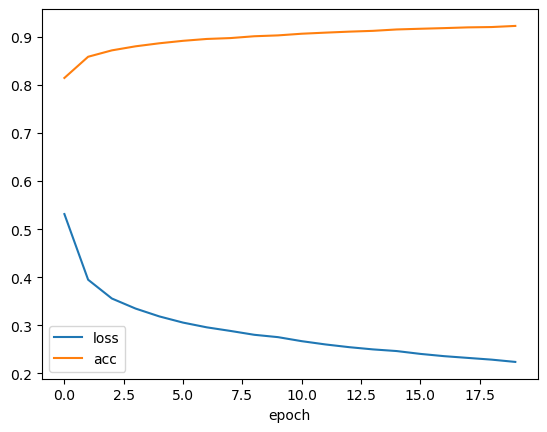

In [12]:
plt.figure()
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [13]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                    batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7658 - loss: 0.6786 - val_accuracy: 0.8397 - val_loss: 0.4406
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8598 - loss: 0.3915 - val_accuracy: 0.8533 - val_loss: 0.3963
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8694 - loss: 0.3596 - val_accuracy: 0.8692 - val_loss: 0.3698
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8763 - loss: 0.3404 - val_accuracy: 0.8821 - val_loss: 0.3409
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3157 - val_accuracy: 0.8838 - val_loss: 0.3361
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3046 - val_accuracy: 0.8763 - val_loss: 0.3591
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8927 - loss: 0.2976 - val_accuracy: 0.8806 - val_loss: 0.3533
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8969 - loss: 0.2865 - 

In [14]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


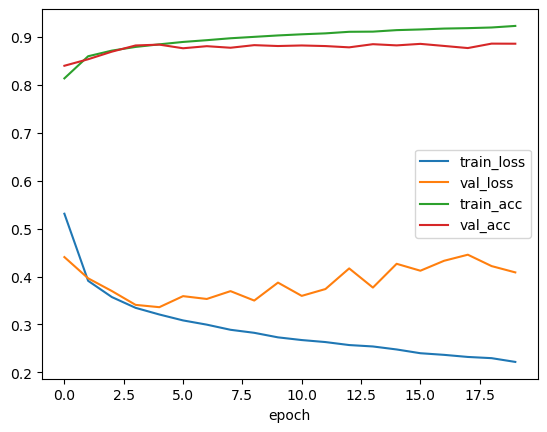

In [15]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [16]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                    batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7732 - loss: 0.6639 - val_accuracy: 0.8512 - val_loss: 0.4163
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8598 - loss: 0.3977 - val_accuracy: 0.8652 - val_loss: 0.3855
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8686 - loss: 0.3612 - val_accuracy: 0.8489 - val_loss: 0.4025
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8768 - loss: 0.3355 - val_accuracy: 0.8775 - val_loss: 0.3472
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3144 - val_accuracy: 0.8627 - val_loss: 0.4013
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8895 - loss: 0.2941 - val_accuracy: 0.8811 - val_loss: 0.3332
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8973 - loss: 0.2799 - val_accuracy: 0.8840 - val_loss: 0.3249
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9014 - loss: 0.2649 - 

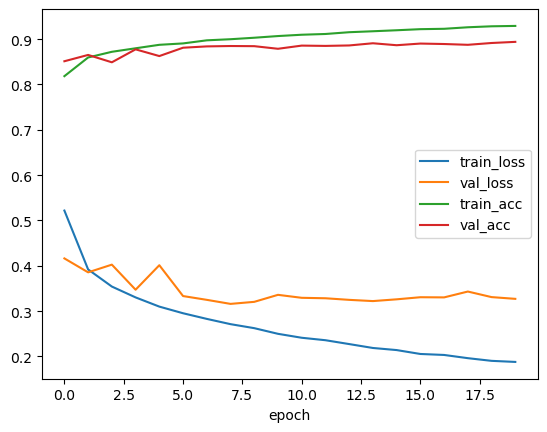

In [17]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- RMSprop 을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropoput)

<img src = "./image/dropout.png" width = "600" height = "600">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
 
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
     
- 드롭아웃은 케라스에서 Dropout 클래스로 제공

- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦

- Flatten 과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음

In [19]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%를 드롭아웃
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃 층은 입력과 출력의 크기가 같음
  - 일부 유닛의 출력을 0으로 만들지만 전체 배열의 크기를 바꾸지 않음

- 모델 훈련이 끝난 후에 평가나 예측을 수행할 떄는 드롭아웃을 적용하지 않아야 함
  - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
  - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [20]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(scaled_train, y_train, epochs= 20, validation_data=(scaled_val, y_val), batch_size= 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7310 - loss: 0.7724 - val_accuracy: 0.8458 - val_loss: 0.4246
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8429 - loss: 0.4455 - val_accuracy: 0.8530 - val_loss: 0.4028
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.4057 - val_accuracy: 0.8717 - val_loss: 0.3560
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8627 - loss: 0.3776 - val_accuracy: 0.8692 - val_loss: 0.3538
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8672 - loss: 0.3645 - val_accuracy: 0.8702 - val_loss: 0.3510
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3539 - val_accuracy: 0.8694 - val_loss: 0.3577
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3513 - val_accuracy: 0.8798 - val_loss: 0.3282
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8768 - loss: 0.3310 - 

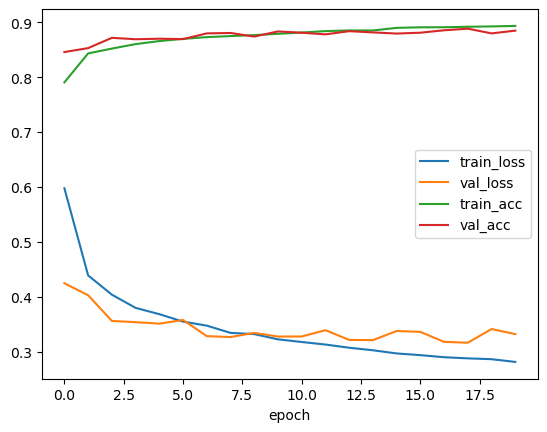

In [22]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 앞선 방법들에 비해 loss와 acc가 바교적 일정하게 유지됨

# 모델 저장과 복언

- 나중에 다시 사용하기 위해서 모델을 저장

- 케라스 모델은 모델의 파라미터를 저장하는 save_weihghts() 메서드를 제공

- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [25]:
model.save_weights("./model/model.weights.h5")

In [26]:
model.save("./model/model-whole.keras")

## 모델 파라미터만 읽어오기

In [27]:
model_weight = model_fn(keras.layers.Dropout(0.3))

In [28]:
model_weight.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_weight.load_weights("./model/model.weights.h5")

- load_weights() 메서드를 사용하려면 save_weights()로 저장했던 모델과 정확히 같은 구조를 가져야 함

- 텐서플로 버전에 따라 load_weights()의 버그로 인해 evaluate()를 사용하기 전에 compile()을 반드시 실행해야 하는 경우가 있음0

In [30]:
model_weight.predict(scaled_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


array([[2.81258434e-01, 1.07585248e-02, 4.08310024e-03, ...,
        3.51991284e-14, 7.99459121e-06, 6.98641811e-10],
       [7.93925952e-03, 9.05764056e-04, 2.57412194e-05, ...,
        2.02016511e-14, 3.26508462e-06, 1.97813632e-09],
       [7.99982233e-11, 6.01574346e-10, 9.25032837e-13, ...,
        9.93760526e-01, 1.64098353e-07, 1.67474223e-04],
       ...,
       [2.37898075e-06, 1.66566539e-14, 1.37196602e-02, ...,
        2.31161844e-24, 2.06891926e-08, 1.16044996e-16],
       [4.70258237e-04, 5.08708964e-10, 3.75811964e-01, ...,
        7.38410302e-17, 2.80441236e-05, 5.50244850e-10],
       [6.25656976e-04, 9.98586977e-11, 9.67671096e-01, ...,
        1.29968115e-17, 3.75210846e-07, 1.16515640e-12]], dtype=float32)

In [31]:
model_weight.predict(scaled_val).shape

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


(12000, 10)

In [33]:
val_labels = np.argmax(model_weight.predict(scaled_val), axis = 1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


In [ ]:
val_labels

array([3, 3, 7, ..., 4, 2, 2], dtype=int64)

In [35]:
y_val

array([0, 3, 7, ..., 4, 6, 2], dtype=uint8)

In [37]:
print(np.mean(val_labels == y_val))

0.8848333333333334


- 케라스의 predict() 메서드는 모델의 예측을 수행
  - 종속변수가 10개의 클래스로 이루어져있기 떄문에 각 클래스에 대한 확률을 반환

- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
  - 배열에서 가장 큰 값의 인덱스를 반환
  - 몇 번쨰 클래스에 대한 확률값이 가장 큰 지 반환
    - 몇 번쨰 클래스로 예측했는지 알 수 있음

- argmax() 함수
  - axis = 0 이면 행을 따라 각 열의 최댓값의 인덱스를 선택
  - axis = 1 이면 열을 따라 각 행의 최댓값의 인덱스를 선택

- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 1, 다르면 0
  - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [38]:
model_whole = keras.models.load_model("./model/model-whole.keras")

In [39]:
model_whole.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8831 - loss: 0.3395


[0.33195894956588745, 0.8848333358764648]

# 콜백(call back)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckPoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.keras", save_best_only = True)

In [42]:
model = model_fn(keras.layers.Dropout(0.3))

In [43]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.fit(scaled_train, y_train, epochs= 20, validation_data=(scaled_val, y_val), batch_size= 32, callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7318 - loss: 0.7658 - val_accuracy: 0.8435 - val_loss: 0.4221
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8383 - loss: 0.4512 - val_accuracy: 0.8616 - val_loss: 0.3812
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8500 - loss: 0.4137 - val_accuracy: 0.8675 - val_loss: 0.3625
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.3878 - val_accuracy: 0.8705 - val_loss: 0.3551
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.3659 - val_accuracy: 0.8711 - val_loss: 0.3519
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3535 - val_accuracy: 0.8752 - val_loss: 0.3441
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8723 - loss: 0.3428 - val_accuracy: 0.8785 - val_loss: 0.3317
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 - loss: 0.3369 - 

- 모델이 훈련한 후에 best-model.keras에 최상의 val_loss를 낸 모델이 저장됨

In [45]:
best_model = keras.models.load_model("./model/best-model.keras")

In [46]:
best_model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8836 - loss: 0.3248


[0.3152577877044678, 0.8854166865348816]

- ModelCheckpoint 콜백이 가장 낮은 손실 값의 모델을 자동으로 저장해주어 편하지만 여전히 20번의 훈련을 해야해서 불편함이 있음

## EarlyStopping 콜백

- 과대적합이 시작되기 전에(검증 점수가 상승할 떄) 훈련을 미리 중지하는 것을 조기 종료(early stopping)라고 부름

- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 떄문에 규제 방법 중 하나로 여겨지기도 함

In [48]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

- patience
  - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
  - patience가 2라면 2번 연속 점증 점수가 형성되지 않으면 훈련 중지

- restore_baet_weights
  - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림

In [49]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.keras", save_best_only= True)

In [51]:
model = model_fn(keras.layers.Dropout(0.3))

In [52]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [53]:
history = model.fit(scaled_train, y_train, epochs= 20, validation_data=(scaled_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb], batch_size= 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7319 - loss: 0.7647 - val_accuracy: 0.8442 - val_loss: 0.4264
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8382 - loss: 0.4510 - val_accuracy: 0.8593 - val_loss: 0.3870
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4054 - val_accuracy: 0.8651 - val_loss: 0.3698
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.3871 - val_accuracy: 0.8543 - val_loss: 0.3861
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3616 - val_accuracy: 0.8752 - val_loss: 0.3421
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3556 - val_accuracy: 0.8739 - val_loss: 0.3484
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3469 - val_accuracy: 0.8773 - val_loss: 0.3312
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3281 - 

In [54]:
# 몇 번 쨰 에포크에서 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

10


- 11번쨰 에포크까지 훈련한 후 중지됨
  - patience가 2이기 떄문에 9번쨰 모델이 최상의 모델임

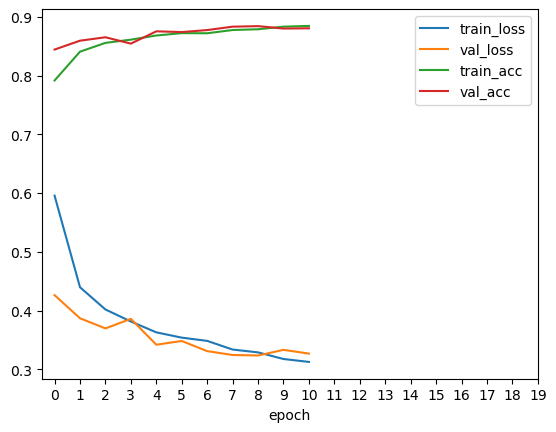

In [55]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks= range(20))
plt.xlabel("epoch")
plt.legend()
plt.show()

In [56]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.8815 - loss: 0.3316


[0.3237418532371521, 0.8840000033378601]

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검증을 수행

In [57]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train /255
scaled_test = x_test /255

In [58]:
es_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights= True)

In [59]:
model = model_fn(keras.layers.Dropout(0.3))

In [60]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [61]:
history = model.fit(scaled_train, y_train, epochs= 20, validation_split=0.2, callbacks=[es_cb], batch_size= 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7330 - loss: 0.7578 - val_accuracy: 0.8372 - val_loss: 0.4506
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8420 - loss: 0.4501 - val_accuracy: 0.8577 - val_loss: 0.3932
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8518 - loss: 0.4084 - val_accuracy: 0.8670 - val_loss: 0.3705
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8594 - loss: 0.3801 - val_accuracy: 0.8724 - val_loss: 0.3575
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8678 - loss: 0.3603 - val_accuracy: 0.8695 - val_loss: 0.3601
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3555 - val_accuracy: 0.8778 - val_loss: 0.3437
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8756 - loss: 0.3401 - val_accuracy: 0.8797 - val_loss: 0.3317
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - loss: 0.3321 - 

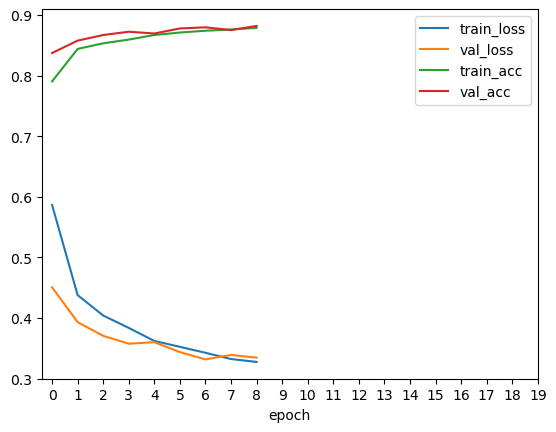

In [62]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks= range(20))
plt.xlabel("epoch")
plt.legend()
plt.show()

In [63]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8751 - loss: 0.3486


[0.35731324553489685, 0.8708999752998352]